# TP1 Video Processing Matis Braun

600


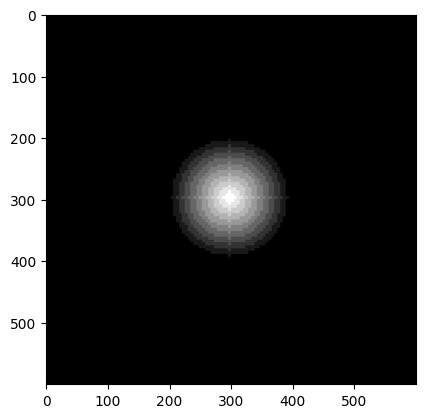

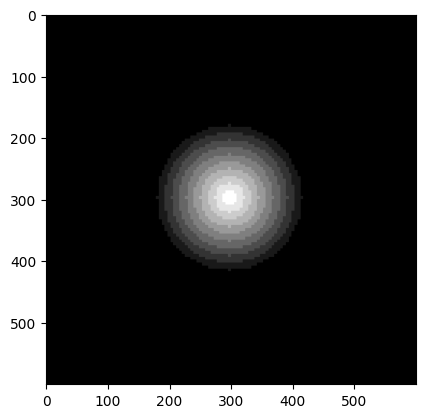

In [4]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import random
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from IPython.display import HTML

IMG1 = Image.open("/kaggle/input/firstimage/1.png")
IMG2 = Image.open("/kaggle/input/firstimage/2.png")

#IMG1 = Image.open("LF038.jpg")
#IMG2 = Image.open("LF039.jpg")

img1 = np.asarray(IMG1) / 255
img2 = np.asarray(IMG2) / 255

print(len(img1[0]))

imgplot = plt.imshow(img1, cmap= 'gray')
plt.show()

img1_g = np.dot(img1[..., :3], [0.2989, 0.5870, 0.1140])
img2_g = np.dot(img2[..., :3], [0.2989, 0.5870, 0.1140])

imgplot = plt.imshow(img2_g, cmap='gray')
plt.show()

In [5]:
print(img1_g)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# QUESTION 1 : Partant de deux frames F1 et F2 ou F2 succede a F1 dans le temps, estimez par une methode pixel-wise les vecteurs de mouvements des pixels de la frame F1 vers F2

Pour cela, nous allons donc parcourir pixel par pixel l'image F1. On va chercher à identifier les vecteurs de mouvements des pixels. 
Si le pixel à une intensité non nulle, nous allons regarder l'intensité des pixels sur F2 autour des coordonnées du pixel de F1 dans un rayon de 1 à distance. On calcule la différence d'intensité entre le pixel dans F1 et les pixels autour dans F2. Le pixel dans F2 aillant la différence d'intensité minimale et ensuite la distance minimale (donc le pixel dans F2 qui se rapproche le plus du pixel dans F1 en intensité puis en distance) va être choisi, et nous allons créer un vecteur qui va du pixel de F1 vers le pixel de F2. Ce sera donc notre vecteur de mouvement de notre pixel. Et l'on fait ca pour chaque pixel de l'image.

In [6]:
Vecteur_deplacement = []

Ici donc nous parcourons notre image F1 pixel par pixel. Si notre pixel n'est pas noir (cas spécial pour notre image) on passe au suivant. Ensuite, si notre pixel dans F1 à une intensité différente dans F2, cela veut dire qu'il a bougé, et nous passerons donc aux calculs suivant. Donc après cela, on regarde l'intensité des voisins du pixel dans F2, dans un cercle de rayon allant de 1 à distance, on regarde la différence d'intensité et on stock dans une liste la différence d'intensité, les coordonnées du pixel de base et du pixel comparé, et la distance. Après avoir regardé tout les pixels voisins, on trie notre liste par intensité et ensuite par distance, et on selectionne le premier pixel de la liste. On stock ensuite les 2 pixels ensemble. On créera le vecteur lorsque l'on voudra plot nos résultats

In [7]:
Vecteur_deplacement = []
for rows in range(0, len(img1_g)):
    for pixel in range(0, len(img1_g[0])):
        if img1_g[rows][pixel] != 0:
            neighbors = []
            liste_triee = []
            height, width = len(img1_g), len(img1_g[0])
            distance = 6
            x = rows
            y = pixel
            if np.abs(img2_g[rows][pixel] - img1_g[rows][pixel]) == 0:
                continue
            else:
                for p in range(1, distance + 1):
                    for i in range(max(0, x - p), min(height, x + p + 1)):
                        for j in range(max(0, y - p), min(width, y + p + 1)):
                            if (x - i) ** 2 + (y - j) ** 2 <= p ** 2:
                                neighbors.append((np.abs(img2_g[i][j] - img1_g[x][y]), i, j, p))
                liste_triee = sorted(neighbors, key=lambda x: (x[0], x[3]))
                if liste_triee:
                    Vecteur_deplacement.append([(img1_g[rows][pixel], rows, pixel, p), liste_triee[0]])
print(Vecteur_deplacement[0::20])

[[(0.09802941176470586, 202, 295, 6), (0.10195058823529413, 201, 295, 1)], [(0.09802941176470586, 206, 267, 6), (0.10195058823529413, 205, 267, 1)], [(0.09802941176470586, 206, 287, 6), (0.10195058823529413, 205, 287, 1)], [(0.09802941176470586, 206, 307, 6), (0.10195058823529413, 205, 307, 1)], [(0.09802941176470586, 206, 327, 6), (0.10195058823529413, 205, 327, 1)], [(0.09802941176470586, 207, 286, 6), (0.10195058823529413, 205, 286, 2)], [(0.09802941176470586, 207, 306, 6), (0.10195058823529413, 205, 306, 2)], [(0.09802941176470586, 207, 326, 6), (0.10195058823529413, 205, 326, 2)], [(0.09802941176470586, 208, 285, 6), (0.10195058823529413, 205, 285, 3)], [(0.09802941176470586, 208, 305, 6), (0.10195058823529413, 205, 305, 3)], [(0.09802941176470586, 208, 325, 6), (0.10195058823529413, 205, 325, 3)], [(0.09802941176470586, 209, 284, 6), (0.10195058823529413, 205, 284, 4)], [(0.09802941176470586, 209, 304, 6), (0.10195058823529413, 205, 304, 4)], [(0.09802941176470586, 209, 324, 6), 

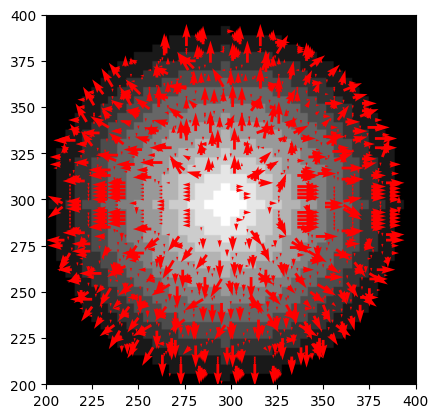

In [8]:
plt.imshow(img1_g, cmap='gray')
coordinates = [[(x1, y1), (x2, y2)] for (value1, x1, y1, p), (value2, x2, y2, p) in Vecteur_deplacement]
o = 0
for (x1, y1), (x2, y2) in coordinates:
    if o % 20 == 0:
        plt.quiver(y1, x1, y2 - y1, x2 - x1, angles='xy', scale_units='xy', scale=0.5, color='red')
    o += 1
    
plt.xlim(200, 400)
plt.ylim(200, 400)

plt.gca().set_aspect('equal', adjustable='box')

plt.show()

On constate que cela marche plutôt bien. On a une idée globale du mouvement entre F1 et F2, même si il y a des vecteurs qui ne sont pas précis

# QUESTION 2 : Refaire cette meme estimation par blocs (BMA) pour differentes tailles de blocs.

Pour faire l'estimation de vecteurs de mouvement par bloc, c'est presque le meme principe que par pixel. On va parcourir bloc par bloc notre image F1 (on choisi la taille de bloc). Donc ensuite, nous allons regarder les blocs dans un rayon de 1 à search_range dans F2 autour de notre bloc de pixels dans F1. On va utiliser la MSE (Mean Squared Error) comme critère de similarité d'intensité entre 2 blocs. Et après cela, nous choisirons le bloc dans F2 avec la plus petite valeur de MSE pour avoir le vecteur de mouvement.

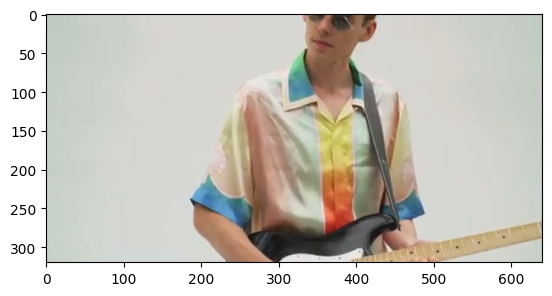

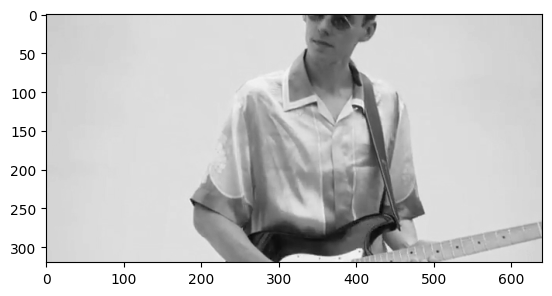

In [10]:
IMG4 = Image.open("/kaggle/input/guitareimage/LF038.jpg")
IMG5 = Image.open("/kaggle/input/guitareimage/LF039.jpg")

imgplot = plt.imshow(IMG4)
plt.show()
img1 = np.asarray(IMG4) / 255
img2 = np.asarray(IMG5) / 255

img1_g = np.dot(img1[..., :3], [0.2989, 0.5870, 0.1140])
img2_g = np.dot(img2[..., :3], [0.2989, 0.5870, 0.1140])

imgplot = plt.imshow(img1_g, cmap='gray')
plt.show()

#IMG6 = Image.open("1.png")
#IMG7 = Image.open("2.png")

#img6 = np.asarray(IMG6) / 255
#img7 = np.asarray(IMG7) / 255

#img6_g = np.dot(img6[..., :3], [0.2989, 0.5870, 0.1140])
#img7_g = np.dot(img7[..., :3], [0.2989, 0.5870, 0.1140])

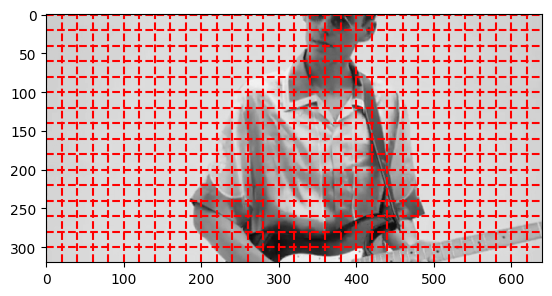

In [11]:
block_size = 20
height, width = img1_g.shape

fig, ax = plt.subplots()
ax.imshow(img1_g, cmap='gray')

for x in range(0, width, block_size):
    ax.axvline(x, color='red', linestyle='--')
for y in range(0, height, block_size):
    ax.axhline(y, color='red', linestyle='--')

plt.show()

/tmp/ipykernel_33/17983090.py:39: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


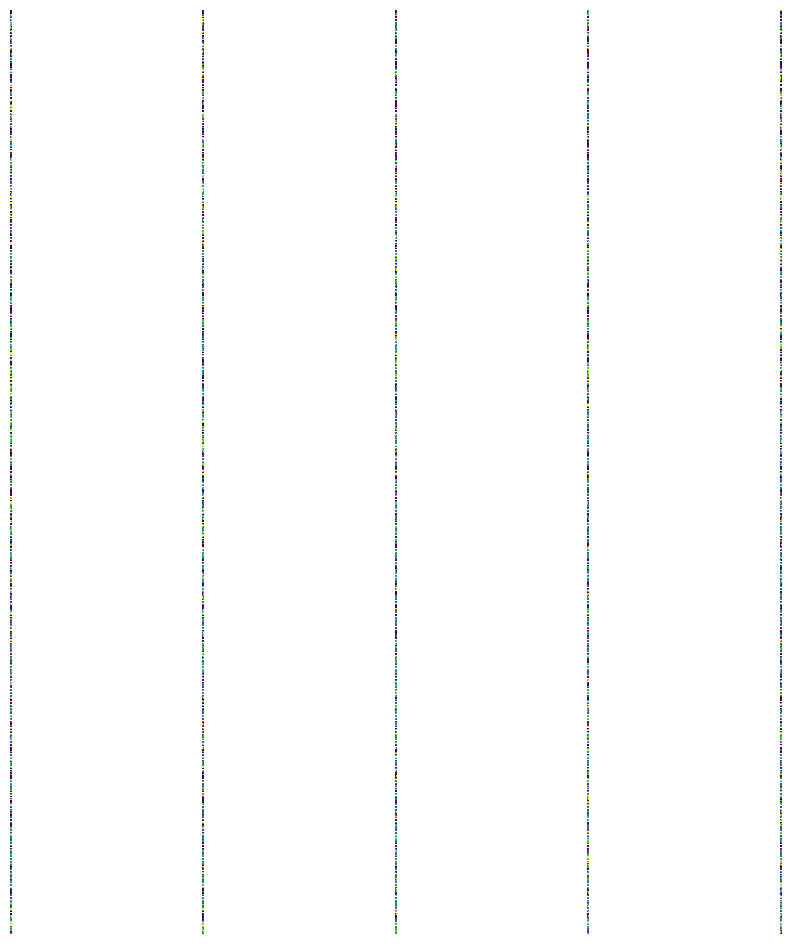

In [12]:
def divide_image_into_blocks(image, block_size):
    blocks = []
    height, width = image.shape[:2]

    for y in range(0, height, block_size):
        for x in range(0, width, block_size):
            block = image[y:y+block_size, x:x+block_size]
            blocks.append(block)

    return blocks

block_size = 8
search_range = 4

blocks = divide_image_into_blocks(img1_g, block_size)

num_blocks = len(blocks)
num_rows = int(np.ceil(num_blocks / 5))
fig, axes = plt.subplots(num_rows, 5, figsize=(12, 12))

for i, block in enumerate(blocks):
    row_index = i // 5
    col_index = i % 5
    if num_rows == 1:
        axes[col_index].imshow(block)
        axes[col_index].axis('off')
    else:
        axes[row_index, col_index].imshow(block)
        axes[row_index, col_index].axis('off')

for i in range(num_blocks, num_rows * 5):
    row_index = i // 5
    col_index = i % 5
    if num_rows == 1:
        axes[col_index].axis('off')
    else:
        axes[row_index, col_index].axis('off')

plt.tight_layout()
plt.show()

Donc ici, nous prendrons des blocs de taile 20 x 20 et un search_range de 3. On définit la fonction MSE. On parcours ensuite l'image par blocs, et on regarde les différents blocs dans un rayon de 1 à search_range. Si jamais le bloc sur lequel on est est en dehors de l'image, on arrête et on passe au suivant. Sinon, on regarde ce bloc sur F2, on calcule le MSE de ce bloc et celui de référence sur F1. On compare avec le meilleur MSE qu'on a trouvé avant, et si jamais il est plus petit, on met à jour le meilleur vecteur de déplacement pour le bloc sur F1.

In [13]:
block_size = 20
search_range = 3

height, width = len(img1_g), len(img1_g[0])
motion_vectors = np.zeros((height // block_size, width // block_size, 2), dtype=np.int32)



def estimation_mouvement(I1, I2, block_size, search_range):
    height, width = I2.shape
    #prend les coords chaque bloc
    coords_blocs = []
    for y in range(0, height - block_size + 1, block_size):
        for x in range(0, width - block_size + 1, block_size):
            coords_blocs.append((y, x))
    #init vect_mouvement
    vecteur_mouvement = np.zeros((height // block_size, width // block_size, 2), dtype=int)
    #on va dans chaque bloc
    for y, x in coords_blocs:
        #save bloc moins d'erreur
        meilleur_vect, erreur = (0, 0), float('inf')
        blocI1 = I1[y:y + block_size, x:x + block_size]
        #on a les distances qui changent
        for y2 in range(- search_range, search_range + 1):
            for x2 in range(- search_range, search_range + 1):
                #les coords des blocs alentours
                y_res, x_res = y + y2, x + x2
                #si depasse pas img
                if 0 <= y_res < height - block_size and 0 <= x_res < width - block_size:
                    #formule d'ereur cours
                    blocI2 = I2[y_res:y_res + block_size, x_res:x_res + block_size]
                    erreur_d = np.sum(np.abs(blocI1 - blocI2))
                    if erreur_d < erreur:
                        meilleur_vect = (y2, x2)
                        erreur = erreur_d
            vecteur_mouvement[y // block_size, x // block_size] = meilleur_vect
    return vecteur_mouvement

motion_vectors = estimation_mouvement(img1_g, img2_g, block_size, search_range)
print(motion_vectors)

[[[ 0  0]
  [ 0  0]
  [ 0  0]
  ...
  [ 0  0]
  [ 0  0]
  [ 0 -1]]

 [[ 0  0]
  [ 0  0]
  [ 0  0]
  ...
  [ 0  0]
  [ 0  0]
  [-3 -1]]

 [[ 0  0]
  [ 0  0]
  [ 0  0]
  ...
  [ 0  0]
  [ 0  0]
  [ 0 -1]]

 ...

 [[ 0  1]
  [ 1  0]
  [ 0  0]
  ...
  [ 2  0]
  [ 2  0]
  [ 2 -1]]

 [[ 2  0]
  [ 1  0]
  [ 1  0]
  ...
  [ 2  0]
  [ 2  0]
  [ 3 -3]]

 [[-1  0]
  [-1  0]
  [-1  0]
  ...
  [-1  3]
  [-1  3]
  [-1 -1]]]


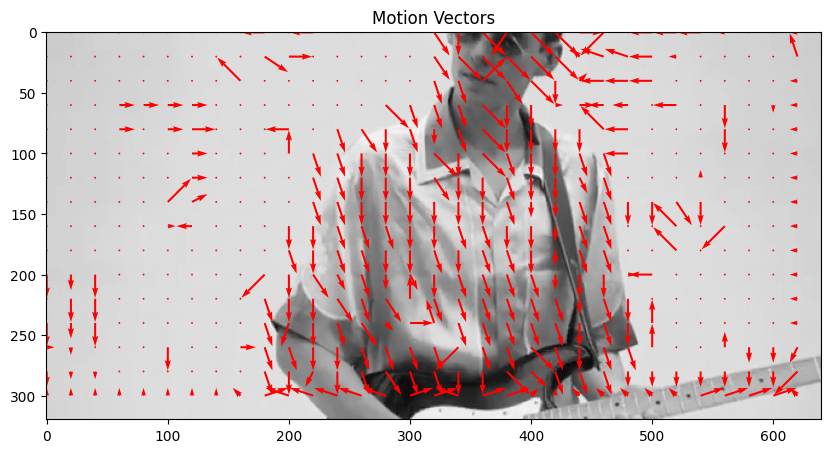

In [14]:
height, width = img1_g.shape
X, Y = np.meshgrid(np.arange(0, width, block_size), np.arange(0, height, block_size))
U = motion_vectors[:,:,1]
V = motion_vectors[:,:,0]
    
plt.figure(figsize=(10, 10))
plt.imshow(img1_g, cmap='gray')
plt.quiver(X, Y, U, V, color='r', scale=100, angles='xy')
plt.title('Motion Vectors')
plt.show()

In [16]:

fig2, ax2 = plt.subplots(figsize=(12, 12))

def update_plot2(frame):
    ax2.clear()
    img = img1_g if frame % 2 == 0 else img2_g
    ax2.imshow(img, cmap='gray', interpolation='nearest')
    ax2.set_title('Mouvement entre image 1 et image 2 reconstruit')
    ax2.set_aspect('equal', adjustable='box')
    ax2.quiver(X, Y, U, V, color='r', scale=100, angles='xy')

X, Y = np.meshgrid(np.arange(0, width, block_size), np.arange(0, height, block_size))
U = motion_vectors[:,:,1]
V = motion_vectors[:,:,0]

ani2 = animation.FuncAnimation(fig2, update_plot2, frames=range(10), interval=1000)
video2 = ani2.to_html5_video()
plt.close(fig2)
HTML(video2)

On constate que c'est pas mal même si il y a aussi beaucoup de vecteurs approximatifs 

# QUESTION 3 : Que deduisez-vous des deux premieres questions ? (regularite du champs de vecteurs de mouvement vs. taille des blocs)

Pour la methode pixel wise, on peut dire les vecteurs de mouvements sont très précis et donc idéal pour les mouvements lents, mais que c'est très long à calculer. Quant au BMA, les blocs permettent d'être beaucoup moins long à calculer, mais on a moins de précisions. Par contre, cette méthode est avantageuse pour les mouvements rapides, car on peut chercher plus loin vu qu'il mets moins de temps à calculer.
Donc pour la régularité des champs de vecteurs, pixel wise aura beaucoup d'irrégularités car chaque pixel à son propre vecteur qui peut avoir été mal calculé (car pas assez cherché loin), alors que pour BMA, il y aura moins d'irrégularités et donc pourra être plus généralisé, mais les vecteurs manqueront quant à eux de précision.
Et le changement de taille des block influence leur précision et leur temps de calculer. De plus petit blocs amélioreront leur précision mais sera plus long à calculer.

# QUESTION 4 : De même avec cette fois-ci une méthode à base de mesh en utilisant une méthode par descente de gradients (approximée par les différences finies). Pourquoi utilise-t-on une descente de gradients ? Vos estimations de champs de vecteurs sont elles plus ou moins régulières que le cas avec blocs ? Justifiez et discutez.


Nous allons maintenant faire une estimation de mouvement en utilisant node-based avec descente de gradient. Pour cela, nous allons
encore parcourir notre image en utilisant des blocs. Donc pour chaque bloc en F1, nous allons utiliser une descente de gradient pour ajuster les vecteurs de mouvements des coins du bloc. On utilisera la DFD pour calculer la différence d'intensité entre 2 blocs. La descente de gradient permettra de changer un peu les vecteurs pour réussir à minimiser l'énergie calculé par DFD.

# Methode à base de Mesh en utilisant une méthode de descente de gradiant

La fonction phi va calcuer le vecteur de déplacement d'un pixel dans le bloc basé sur les vecteurs de mouvement des
4 coins du bloc

In [21]:
def phi(pos, coords_block, coords_block_end, block_size, d_vectors):
    cst = (coords_block_end[0] - coords_block[0]) * (coords_block_end[1] - coords_block[1])

    phi1 = ((coords_block_end[0] - pos[0]) * (coords_block_end[1] - pos[1])) / cst
    phi2 = ((pos[0] - coords_block[0]) * (coords_block_end[1] - pos[1])) / cst
    phi3 = ((coords_block_end[0] - pos[0]) * (pos[1] - coords_block[1])) / cst
    phi4 = ((pos[0] - coords_block[0]) * (pos[1] - coords_block[1])) / cst

    d_vect = (phi1 * d_vectors[0]) + (phi2 * d_vectors[1]) + (phi3 * d_vectors[2]) + (phi4 * d_vectors[3])

    return d_vect

La fonction dfd_energy calcule l'énergie DFD entre les pixels d'un bloc de F1 et les pixels du bloc déplacé dans F2

In [22]:
def dfd_energy(i1, i2, coords_block, coords_block_end, block_size, d_vectors):
    energy = 0
    for i in range(coords_block[0], coords_block_end[0] + 1):
        for j in range(coords_block[1], coords_block_end[1] + 1):
            pos = (i, j)
            #On calcule le vecteur de déplacement 
            deplacement = phi(pos, coords_block, coords_block_end, block_size, d_vectors)
            #On calcule la novelle position du pixel
            moved_pos = (i + deplacement[0], j + deplacement[1])
            #On verifie si c'est bien dans l'image
            if 0 <= moved_pos[0] < i2.shape[1] and 0 <= moved_pos[1] < i2.shape[0]:
                #Si oui, on calcule de E(DFD)
                energy += (i2[int(moved_pos[1]), int(moved_pos[0])] - i1[pos[1],pos[0]]) ** 2
    #Retourne l'energie du block
    return energy

La fonction gradient_descent fait justela descente de gradient qui permet d'ajuster les vecteurs de mouvements des coins

In [23]:
def gradient_descent(i1, i2, coords_block, coords_block_end, block_size, learning_rate, num_iterations, k):
    d_vectors = [np.zeros(2) for _ in range(4)]
    for _ in range(num_iterations):
        sure = [np.zeros(2) for _ in range(4)]
        #On calcul le dfd
        base_energy = dfd_energy(i1, i2, coords_block, coords_block_end, block_size, d_vectors)
        #On itere dans chaque coin
        for i in range(4):
            #Dans chaque x, y
            for j in range(2):
                gradients = d_vectors
                #On add k pour changer
                gradients[i][j] = k + d_vectors[i][j]
                #On calcul le nouveau DFD avec le changement
                new_energy = dfd_energy(i1, i2, coords_block, coords_block_end, block_size, gradients)
                #On calcul dérivé partielle
                dev_part = (new_energy - base_energy) / k
                #sure[i][j] = max(min(d_vectors[i][j] - learning_rate * dev_part, 4), -4)
                sure[i][j] = d_vectors[i][j] - learning_rate * dev_part
        d_vectors = sure
    return d_vectors

Dans la fonction node_based_motion_estimation, on se déplace de bloc en bloc dans l'image pour calculer dans chaque bloc son vecteur de mouvement grâve à la descente de gradient 

In [45]:
def mesh_based_motion_estimation(i1, i2, block_size=(50, 50), learning_rate=0.1, num_iterations=5, k=1):
    #Resultat des vecteurs
    motion_vectors = []
    #On prend height et width
    h, w = i1.shape
    print(h)
    print(w)
    for i in range(0, h - block_size[0] + 1, block_size[0]):
        for j in range(0, w - block_size[1] + 1, block_size[1]):
            #RAJOUTER IF
            #Coord haut gauche du block (x, y)
            coords_block = (j, i)
            #Coord bas droite du block (x, y)
            coords_block_end = (j + block_size[1] - 1, i + block_size[0] - 1)
            #On fait la descente de gradient qui calcule les vecteurs de mouvements
            d_vectors = gradient_descent(i1, i2, coords_block, coords_block_end, block_size, learning_rate, num_iterations, k)
            motion_vectors.append((coords_block, coords_block_end, d_vectors))
    return motion_vectors

In [59]:
motion_vectors = mesh_based_motion_estimation(img1_g, img2_g, block_size=(50, 50), learning_rate=0.1, num_iterations=5, k=1)

320
640


In [60]:
print(motion_vectors)

[((0, 0), (49, 49), [array([4.99769914, 4.99658989]), array([4.99652818, 4.99649797]), array([4.99644455, 4.99642033]), array([4.99547906, 4.99518695])]), ((50, 0), (99, 49), [array([4.99889806, 4.99825059]), array([4.99823751, 4.99820061]), array([4.99814362, 4.99813823]), array([4.99768474, 4.99749489])]), ((100, 0), (149, 49), [array([4.99723817, 4.99680839]), array([4.99678815, 4.99678672]), array([4.99677305, 4.99676274]), array([4.99597143, 4.99581753])]), ((150, 0), (199, 49), [array([4.99994324, 4.99984895]), array([4.99985871, 4.99986199]), array([4.99985514, 4.99985428]), array([4.99982   , 4.99979614])]), ((200, 0), (249, 49), [array([4.99988048, 4.99962245]), array([4.99962127, 4.9996178 ]), array([4.99961654, 4.9996191 ]), array([4.99958366, 4.99946136])]), ((250, 0), (299, 49), [array([4.99958469, 4.99932277]), array([4.99931993, 4.99931942]), array([4.99930693, 4.99930291]), array([4.99914563, 4.99906838])]), ((300, 0), (349, 49), [array([4.82726313, 4.82726313]), array(

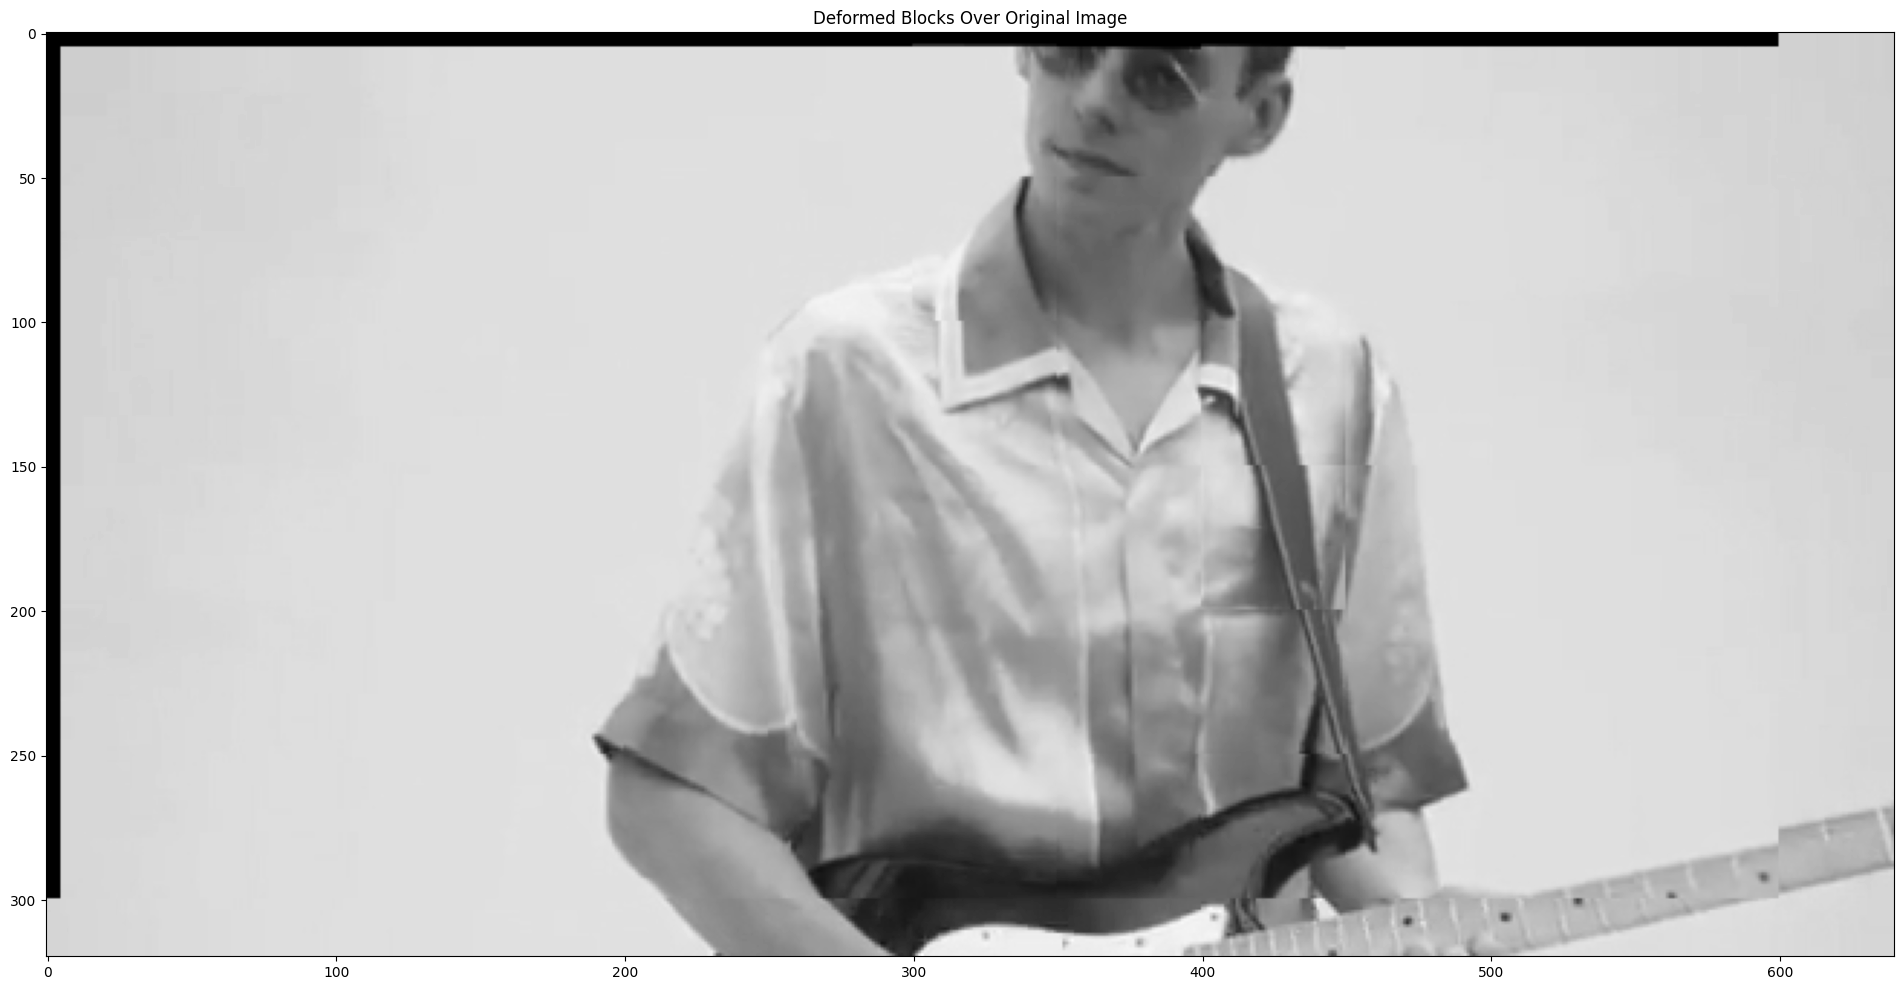

In [61]:
import cv2
def plot_motion_vectors(i1, motion_vectors, block_size):
    height, width = i1.shape
    i1_copy = i1.copy()
    for coords_block, coords_block_end, d_vectors in motion_vectors:
        x, y = coords_block
        x_end, y_end = x + block_size[0] - 1, y + block_size[1] - 1
        original_block = np.array([[x, y],[x_end, y],[x, y_end],[x_end, y_end]])
        displaced_block = original_block + np.array(d_vectors)
        point_original = np.float32(original_block)
        point_dist = np.float32(displaced_block)
        M = cv2.getPerspectiveTransform(point_original, point_dist)
        warped_block = cv2.warpPerspective(i1, M, (width, height))
        for i in range(y, y_end + 1):
            for j in range(x, x_end + 1):
                if 0 <= i < height and 0 <= j < width:
                    i1_copy[i, j] = warped_block[i, j]
    plt.figure(figsize=(30, 12))
    plt.imshow(i1_copy, cmap='gray')
    plt.title('Deformed Blocks Over Original Image')
    plt.show()
    
deformed_image = plot_motion_vectors(img1_g, motion_vectors, (50, 50))